In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

C:\Users\ujwal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
import nulls_breakdown
import get_info

In [9]:
get_info.show_info(train)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
column type,int64,object,object,object,int64,object,object,int64,int64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,173638,383247,0
null values(%),0,0,0,0,0,0,0,0,0,31.5666,69.6727,0


In [10]:
nulls_breakdown.nulls_breakdown(train)

[iloc = 9] Product_Category_2 has 173638 null values: 31.57% null
[iloc = 10] Product_Category_3 has 383247 null values: 69.67% null
Out of 12 total columns, 2 contain null values; 16.67% columns contain null values.


In [11]:
train.Product_ID.dtype

dtype('O')

In [12]:
train['Product_ID_Number'] = train['Product_ID'].str.replace('([A-Za-z]+)', '').astype('int')

In [13]:
train['Priduct_No_Str']= train['Product_ID'].str.extract('([A-Za-z]+)')
train['Priduct_No_Str'].value_counts()

P    550068
Name: Priduct_No_Str, dtype: int64

In [14]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Product_ID_Number', 'Priduct_No_Str'],
      dtype='object')

In [15]:
product_cat_cols = ['Product_Category_1','Product_Category_2', 'Product_Category_3'] 
for item in product_cat_cols:
    print(item)
    print(train[item].value_counts())

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64
Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64
Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  Product_ID_Number           550068 non-null  int32  
 13  Priduct_No_Str

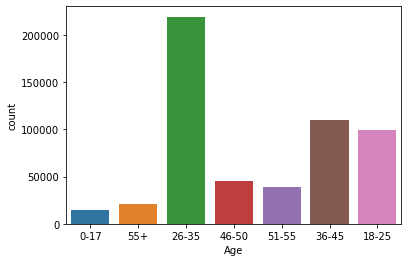

In [17]:
sns.countplot(train['Age'])

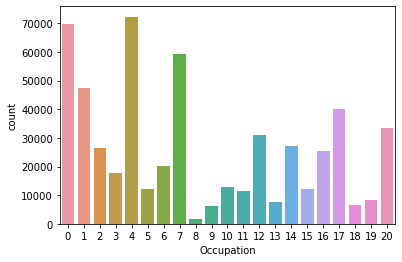

In [18]:
sns.countplot(train['Occupation'])

In [19]:
s = (train.dtypes == 'object')
cat_cols = list(s[s].index)

In [21]:
target = ['Purchase']
num_cols = train.select_dtypes(include=np.number)

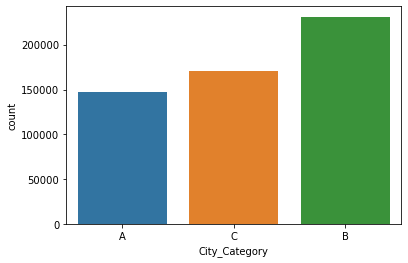

In [25]:
sns.countplot(train['City_Category'])

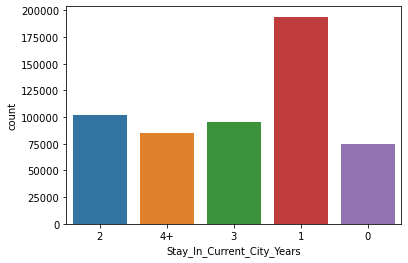

In [26]:
sns.countplot(train['Stay_In_Current_City_Years'])

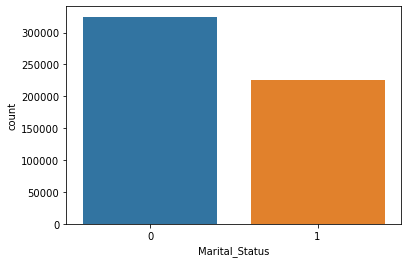

In [27]:
sns.countplot(train['Marital_Status'])

In [28]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Product_ID_Number', 'Priduct_No_Str'],
      dtype='object')

## Missing values in ` 'Product_Category_2', 'Product_Category_3'`

### Approach 1
* Filling all NA in both with 0 and normalize columns
* Do feature Engineering (dummies)
* Baseline model linear regression

In [35]:
missing_cols = [col for col in train.columns if train[col].isnull().any()]

In [43]:
for item in missing_cols:
    train['Cat_'+ str(missing_cols.index(item)) +'_NA'] = np.where(train[item].isnull(),1,0)


In [45]:
for item in missing_cols:
    train[item].fillna(0,inplace = True)

In [46]:
nulls_breakdown.nulls_breakdown(train)

Out of 16 total columns, 0 contain null values; 0.0% columns contain null values.
